In [1999]:
import urllib.request
url = "https://raw.githubusercontent.com/ulissesdias/tt003/main/libraries/breakthrough.py"
urllib.request.urlretrieve(url, "breakthrough.py")

## Importando a biblioteca
import breakthrough as bkt

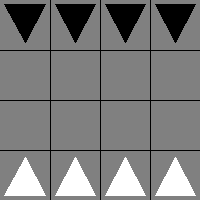

In [2000]:
lines = 4
columns = 4
white_positions = ((1,1),(1,2),(1,3),(1,4))
black_positions = ((4,1),(4,2), (4,3),(4,4))

board = bkt.draw_board(4,4,((1,1), (1,2),(1,3),(1,4)), ((4,1),(4,2),(4,3), (4,4)))
display(board)

In [2001]:
player = bkt.random_player
winner, history = bkt.game(player, player, lines, columns, white_positions, black_positions , epsilon = None)
images = bkt.generate_image_history(4, 4, history)
bkt.display_sequence(images)

interactive(children=(IntSlider(value=3, description='frame', max=7), Output()), _dom_classes=('widget-interac…

<function breakthrough.display_sequence.<locals>._show(frame=(0, 7))>

In [2002]:
def campeonato(player1, player2, num_games=1000):
    whites = 0
    blacks = 0
    for i in range(num_games):
        winner, history = bkt.game(player1, player2, lines, columns, white_positions, black_positions, epsilon=0.3)
        if winner == 1:
            whites += 1
        else:
            blacks += 1
    return whites, blacks


In [2003]:
w, b = campeonato(player,player, num_games=1000)

total_games = w + b
w_percentage = (w / total_games) * 100
b_percentage = (b / total_games) * 100

print(f"Percentage of wins for whites: {w_percentage}%")
print(f"Percentage of wins for blacks: {b_percentage}%")


Percentage of wins for whites: 56.39999999999999%
Percentage of wins for blacks: 43.6%


In [2004]:
def rewards(whitespos, blackspos, turn) :
    winner = bkt.winner(lines=lines, columns=columns, white_positions= whitespos, black_positions=blackspos)

    if winner == turn:
        return 10
    else:
        return -10

In [2005]:
import random
import numpy as np
## Para computação dos state_values, usaremos gamma = 0.7 para
## descontos futuros
gamma = 0.7

## Os state_values serão uma variável global neste notebook. Nele
## estará contido tudo aquilo que o agente precisa para fazer uma boa
## jogada

def novo_player(lines, columns, white_positions, black_positions, turn, epsilon=0.3) :
    valid_moves = bkt.get_valid_moves(lines, columns, white_positions, black_positions, turn)
    
    if epsilon < 0.5 :
        return valid_moves[0]
    else :
        return valid_moves[-1]
    

def player_rl(lines, columns, white_positions, black_positions, turn, epsilon):

    valid_moves = bkt.get_valid_moves(lines, columns, white_positions, black_positions, turn)

    
    
    epsilon_random = random.random()
    
    if epsilon_random < epsilon:
        return random.choice(valid_moves)
    else:
        new_valid = np.array(valid_moves)
        scores = []

        for move in new_valid:

            current = move[0]
            next = move[1]
            next_pos = white_positions if turn == 1 else black_positions
            next_pos = np.array(next_pos)
            index = np.where(np.all(next_pos == current, axis=1))[0][0]
            next_pos[index] = next
        
            format = (turn, tuple(map(tuple, move)), black_positions) if turn == 1 else (turn, white_positions, tuple(map(tuple, move)))

            rw = rewards(next_pos, black_positions, turn) if turn == 1 else rewards(white_positions, next_pos, turn)

            scores.append(rw + gamma*state_values.get(format, 0))
           

      
        
        best_score = np.max(scores)
        indices = np.where(scores == best_score)[0]
       
        return valid_moves[random.choice(indices)]

In [2006]:
def update_state_values_monte_carlo(rewards, amostra, gamma = 0.3, alpha = 0.1) :
    ## Definiremos o último state_value como zero para iniciar o processo iterativo.
    discounted_return = 0
    next_state        = amostra[-1]
    ## Observe o uso de "reversed" estamos iterando de trás pra frente.
    for state in reversed(amostra[:-1]) :
       
        discounted_return = gamma*discounted_return + rewards(next_state[1], next_state[2], next_state[0])
      
        ## Abaixo a fórmula para atualização dos state-values. Isso substitui o valor esperado (média).
        ## Note que estamos inicializando os state_values com zero
    
        state_values[state] = state_values.get(state,0) + alpha*(discounted_return - state_values.get(state, 0))
        next_state = state


In [2007]:
state_values = {}
alpha  = 0.1 ## Aproximação da média

ITERACOES = 1000
for i in range(ITERACOES) :
  ep = max(0.01, (ITERACOES - i)/ITERACOES)
  _, amostra = bkt.game(player_rl, player, lines, columns, white_positions, black_positions, epsilon = ep)

  update_state_values_monte_carlo(rewards, amostra, gamma, alpha)
 



In [2008]:

w, b = campeonato(player_rl,bkt.random_player, num_games=1000)


total_games = w + b
w_percentage = (w / total_games) * 100
b_percentage = (b / total_games) * 100

print(f"Percentage of wins for player_rl (whites): {w_percentage}%")
print(f"Percentage of wins for random player (blacks): {b_percentage}%")

Percentage of wins for player_rl (whites): 81.69999999999999%
Percentage of wins for random player (blacks): 18.3%


In [2009]:

w, b = campeonato(bkt.random_player,player_rl,  num_games=1000)


total_games = w + b
w_percentage = (w / total_games) * 100
b_percentage = (b / total_games) * 100

print(f"Percentage of wins for random player (whites): {w_percentage}%")
print(f"Percentage of wins for player_rl (blacks): {b_percentage}%")

Percentage of wins for random player (whites): 35.6%
Percentage of wins for player_rl (blacks): 64.4%


In [2010]:
winner, history = bkt.game(player_rl, bkt.random_player, lines, columns, white_positions, black_positions, epsilon=0.3)
images = bkt.generate_image_history(4, 4, history)
bkt.display_sequence(images)


interactive(children=(IntSlider(value=6, description='frame', max=13), Output()), _dom_classes=('widget-intera…

<function breakthrough.display_sequence.<locals>._show(frame=(0, 13))>

In [2011]:
def human_player(lines, columns, white_positions, black_positions, turn, epsilon) :
    valids  = bkt.get_valid_moves(lines, columns, white_positions, black_positions, turn)
    print("Escolha um movimento por ordem de apresentação a seguir, iniciando em 0")
    for index, move in enumerate(valids):
        print(f"{index} => {move}")

    board = bkt.draw_board(lines,columns,white_positions, black_positions)
    display(board)
    move = int(input())
    
    while move+1 > len(valids):
        move = int(input())
    return valids[move]


Escolha um movimento por ordem de apresentação a seguir, iniciando em 0
0 => [(4, 1), (3, 2)]
1 => [(4, 1), (3, 1)]
2 => [(4, 2), (3, 3)]
3 => [(4, 2), (3, 2)]
4 => [(4, 2), (3, 1)]
5 => [(4, 3), (3, 4)]
6 => [(4, 3), (3, 3)]
7 => [(4, 3), (3, 2)]
8 => [(4, 4), (3, 4)]
9 => [(4, 4), (3, 3)]


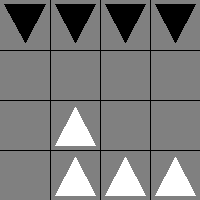

ValueError: invalid literal for int() with base 10: ''

In [2012]:
result, history = bkt.game(player_rl,human_player, lines, columns, white_positions, black_positions, epsilon=0.3)
images = bkt.generate_image_history(lines, columns, history)
bkt.display_sequence(images)
